# Convolutional Neural Network

### Import Preliminaries# 

In [4]:
import numpy as np
from keras import models
from keras import layers
from keras.datasets import imdb
from keras import optimizers

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "/Users/Kavi/anaconda/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 41, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/Users/Kavi/anaconda/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/Users/Kavi/anaconda/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/Users/Kavi/anaconda/lib/python3.6/imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "/Users/Kavi/anaconda/lib/python3.6/imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: dlopen(/Users/Kavi/anaconda/lib/python3.6/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so, 10): Library not loaded: @rpath/libcudnn.5.dylib
  Referenced from: /Users/Kavi/anaconda/lib/python3.6/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so
  Reason: image not found


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

### Preprocessing Data

In [3]:
# Define Vectorization 
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
  
# Preprocessing Training and Testing Data

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

NameError: name 'imdb' is not defined

### Build the Model

In [5]:
# Model implementation in keras
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(61, activation='relu', ))
model.add(layers.Dense(1, activation='sigmoid'))

### Compile the Model

In [6]:
# Compiling the model
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### Fitting the Model

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val, y_val),
                    verbose=0)

### View Model Attributes

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### Visualization The Results

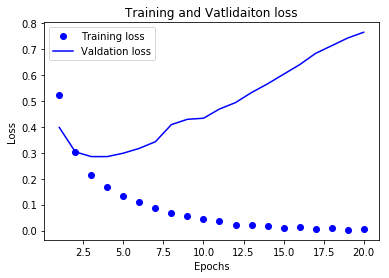

In [9]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Fix: Use "history_dict['acc']" instead for the variable "acc"
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Valdation loss')
plt.title('Training and Vatlidaiton loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

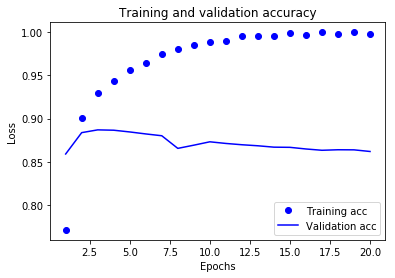

In [10]:
# Plotting the training and test validation accuracy 
plt.clf() #Clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()